In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.svm import SVC                        #SVM "Support vector classifier"
from sklearn import naive_bayes   #naive bayes classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import preprocessing
from xgboost import plot_importance
from xgboost import XGBClassifier
import xgboost as xgb
import seaborn as sns; 
sns.axes_style("whitegrid")
sns.set_context("paper")
np.random.seed(0)
import warnings
warnings.filterwarnings('ignore')

In [2]:
LT_salaries = games = pd.read_csv('Data/LT_salaries.csv')
LG_salaries = games = pd.read_csv('Data/LG_salaries.csv')
C_salaries = games = pd.read_csv('Data/C_salaries.csv')
RG_salaries = games = pd.read_csv('Data/RG_salaries.csv')
RT_salaries = games = pd.read_csv('Data/RT_salaries.csv')

In [3]:
RT_salaries.head()

,Player,Team,Cap Number,Cash Spent
0,Jack Conklin,Browns,"$13,000,000","$10,000,000"
1,Bryan Bulaga,Chargers,"$11,083,333","$7,750,000"
2,Lane Johnson,Eagles,"$11,056,498","$13,715,000"
3,Nate Solder,Giants,"$9,500,000","$4,000,000"
4,Trent Brown,Patriots,"$7,588,235","$8,058,824"


In [4]:
#Make Cap hit a number
LT_salaries['Cap'] = LT_salaries['Cap Number'].str.replace("$","").str.replace(",","")
LT_salaries['Cap'] = pd.to_numeric(LT_salaries['Cap'])

## Plot Undervalued LT

In [5]:
best_OL = pd.read_csv('best_OL.csv')
best_OL.head()

,index,displayName,pred_OLwin,pff_positionLinedUp_LT,pff_positionLinedUp_LG,pff_positionLinedUp_RG,pff_positionLinedUp_RT
0,131,Joe Thuney,10954,0.0,12937.0,0.0,0.0
1,64,Creed Humphrey,10773,0.0,0.0,0.0,0.0
2,60,Connor McGovern,10739,0.0,0.0,1914.0,0.0
3,137,Jonah Jackson,10488,0.0,12158.0,0.0,0.0
4,240,Trey Smith,10347,0.0,0.0,13292.0,0.0


In [6]:
best_LT = best_OL[best_OL.pff_positionLinedUp_LT != 0]
best_LT.head(10)

,index,displayName,pred_OLwin,pff_positionLinedUp_LT,pff_positionLinedUp_LG,pff_positionLinedUp_RG,pff_positionLinedUp_RT
9,196,Orlando Brown,9744,13298.0,0.0,0.0,0.0
14,17,Austin Jackson,9243,5194.0,5934.0,0.0,0.0
15,80,Donovan Smith,9042,11025.0,0.0,0.0,0.0
17,199,Penei Sewell,8989,12257.0,0.0,0.0,0.0
30,49,Charles Leno,8710,12131.0,0.0,0.0,0.0
36,95,Garett Bolles,8462,11165.0,0.0,0.0,0.0
37,3,Alejandro Villanueva,8444,9453.0,0.0,0.0,1573.0
50,166,Liam Eichenberg,8064,6714.0,0.0,0.0,4053.0
53,158,Kolton Miller,7904,10052.0,0.0,0.0,0.0
57,65,D.J. Humphries,7663,9904.0,0.0,0.0,0.0


In [7]:
# 
LT_salaries = LT_salaries.merge(best_LT, how = 'inner', left_on = 'Player', right_on = 'displayName')

In [8]:
#Isolate receivers with below average salaries
mean = LT_salaries['Cap'].mean()
mean2 = LT_salaries['pred_OLwin']
undervalued_LT = LT_salaries[LT_salaries['Cap']<= mean]
undervalued_LT = LT_salaries[LT_salaries['pred_OLwin']>= mean2]
undervalued_LT = undervalued_LT.sort_values(by = 'pred_OLwin', ascending = True)

In [9]:
undervalued_LT[['Player', 'Team', 'Cap Number']].head(9).reset_index(drop = True)

,Player,Team,Cap Number
0,Jason Spriggs,Falcons,"$850,000"
1,Josh Wells,Buccaneers,"$987,500"
2,Will Holden,Lions,"$868,889"
3,Calvin Anderson,Broncos,"$850,000"
4,James Hudson,Browns,"$858,104"
5,Elijah Wilkinson,Bears,"$987,500"
6,Kendall Lamm,Titans,"$2,591,176"
7,Mekhi Becton,Jets,"$4,192,283"
8,Joseph Noteboom,Rams,"$1,124,723"


Text(0.5, 1.0, 'Visualizing Undervalued Left-Tackles')

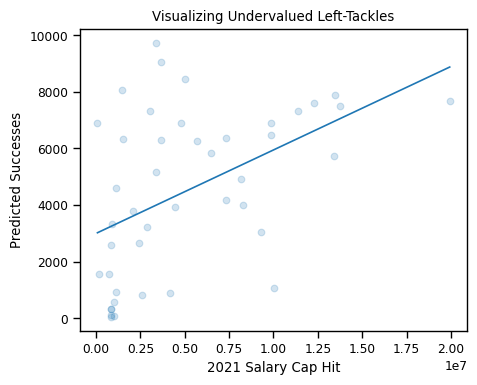

In [10]:
x =  LT_salaries['Cap']
y = LT_salaries['pred_OLwin']
fig, ax = plt.subplots(figsize=(5, 4),dpi= 100)
plt.scatter(x,y,label = 'All Left-Tackles',alpha=.2)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.xlabel('2021 Salary Cap Hit')
plt.ylabel('Predicted Successes')
plt.title("Visualizing Undervalued Left-Tackles")
